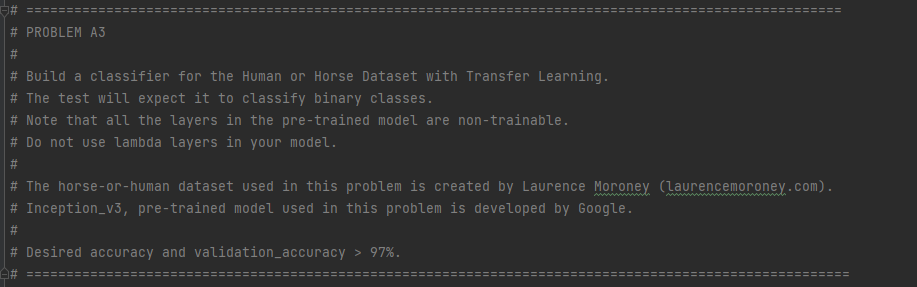

In [ ]:
import urllib.request
import zipfile
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
def solution_A3():
    inceptionv3 = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
    urllib.request.urlretrieve(
        inceptionv3, 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
    local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

    pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None) # YOUR CODE HERE

    for layer in pre_trained_model.layers:
        layer.trainable = False

    last_layer = pre_trained_model.get_layer('mixed7') # YOUR CODE HERE

    data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
    urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip')
    local_file = 'horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/horse-or-human')
    zip_ref.close()

    data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
    urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip')
    local_file = 'validation-horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/validation-horse-or-human')
    zip_ref.close()

    train_dir = 'data/horse-or-human'
    validation_dir = 'data/validation-horse-or-human'

    train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
        # YOUR CODE HERE

    # YOUR IMAGE SIZE SHOULD BE 150x150
    train_generator= train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))    # YOUR CODE HERE

    test_datagen = ImageDataGenerator(rescale=1.0 / 255.)
    validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                            batch_size=20,
                                                            class_mode='binary',
                                                            target_size=(150, 150))

    x = layers.Flatten()(last_layer.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x) # YOUR CODE HERE, BUT END WITH A Neuron Dense, activated by sigmoid
    x = layers.Dense(1, activation='sigmoid')(x)

    model = Model(pre_trained_model.input, x)

    model.compile(optimizer=RMSprop(lr=0.0001),
                  loss='binary_crossentropy',
                  metrics=['acc'])

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('acc') > 0.97):
                print("OK > 97%")
                self.model.stop_training = True

    callbacks = myCallback()
    history = model.fit_generator(
        train_generator,
        validation_data=validation_generator,
        steps_per_epoch=10,
        epochs=10,
        validation_steps=10,
        verbose=2,
        callbacks=[callbacks])

    return model

In [ ]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_A3()
    model.save("model_A3.h5")